In [1]:
class_names=['boxing','handclapping','handwaving','jogging','running','walking']
class_names

['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']

In [2]:
# Import DataSet
import numpy as np

#Loading Video DataSets
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

X_valid = np.load('X_valid.npy')
y_valid = np.load('y_valid.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

X_train_bgsub = np.load('X_train_bgsub.npy')
y_train_bgsub = np.load('y_train_bgsub.npy')

X_valid_bgsub = np.load('X_valid_bgsub.npy')
y_valid_bgsub = np.load('y_valid_bgsub.npy')

X_test_bgsub = np.load('X_test_bgsub.npy')
y_test_bgsub = np.load('y_test_bgsub.npy')

In [8]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Labeling Class
from array import *
def label(test_label):
    x=[]
    for sample in test_label:
        for i in range(0,6):
            if sample[i]>0.5:
                x.append(i)
                break
    return np.array(x, dtype=np.uint8)

def frameFetch(vid_list,frame_no):
    z=[]
    x=0
    while(x<100):
        z.append(vid_list[x][frame_no])
        x+=1
    result = np.array(z,dtype=np.float64)
    return result.reshape(100,35,35)
        
                

In [4]:
# load and evaluate the saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('latest.h5')
# summarize model.
model.summary()


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 50, 35, 35, 16)    9856      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 35, 35, 16)    64        
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 17, 35, 35, 64)    92224     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 17, 18, 18, 64)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 17, 18, 18, 128)   368768    
_________________________________________________________________
max_poolin

In [5]:
# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 97.00%


Normalized confusion matrix


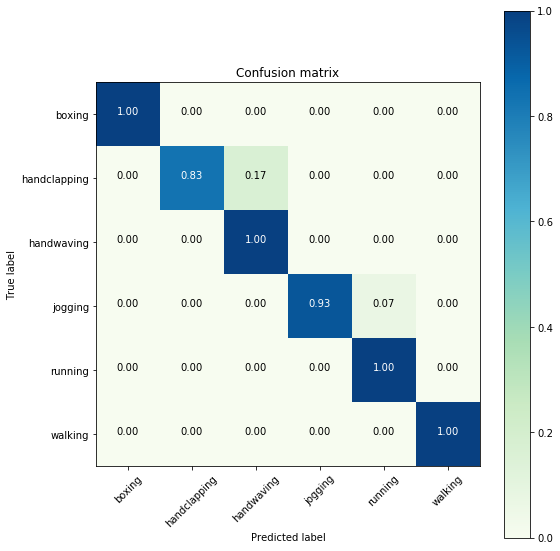

In [9]:
from keras.utils import to_categorical
y_predictions = model.predict_classes(X_test_bgsub);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test_bgsub.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking'], 
                                              normalize=True)


In [10]:
prediction = model.predict(X_test_bgsub)

In [12]:
prediction[0]

array([4.1036944e-07, 1.2513354e-07, 7.2514058e-06, 7.7842712e-01,
       2.2155903e-01, 6.0600260e-06], dtype=float32)

In [13]:
#Labeling Class
from array import *
def label(test_label):
    x=[]
    for sample in test_label:
        for i in range(0,6):
            if sample[i]>0.5:
                x.append(i)
                break
    return np.array(x, dtype=np.uint8)

def frameFetch(vid_list,frame_no):
    z=[]
    x=0
    while(x<100):
        z.append(vid_list[x][frame_no])
        x+=1
    result = np.array(z,dtype=np.float64)
    return result.reshape(100,35,35)

In [14]:
test_labels=label(y_test_bgsub)
test_images=frameFetch(X_test,10)

In [15]:
#5 label Prediction
class_names=['boxing', 'handclapping', 'handwaving', 'jogging', 'running', 'walking']

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(6))
  plt.yticks([])
  thisplot = plt.bar(range(6), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

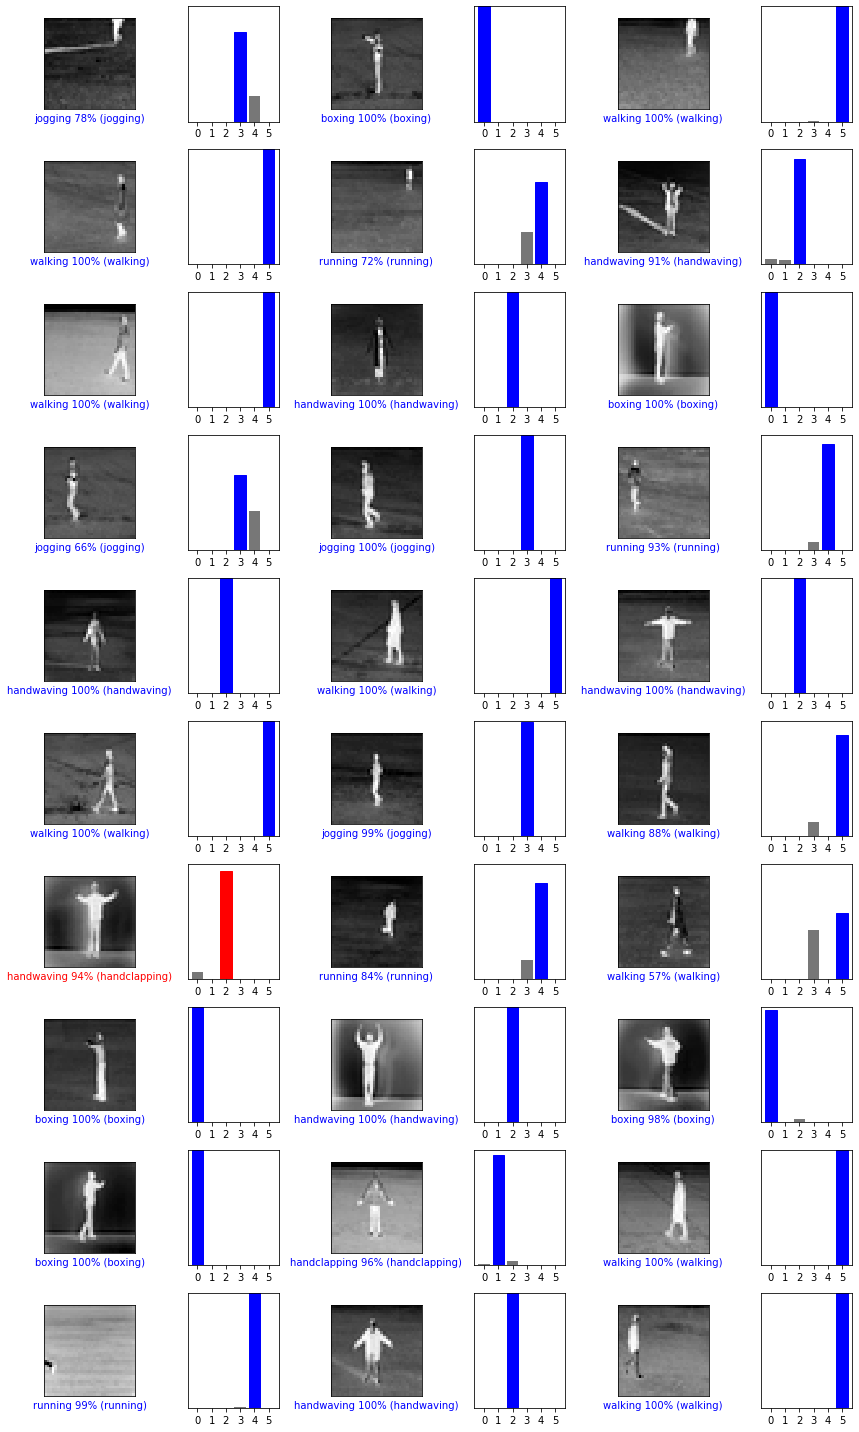

In [16]:
# Plot the first X test videos, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()